# Set up

In [1]:
# Dependencies
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.stats import linregress
import datetime as dt 
# import seaborn as sns

# Data Cleaning

In [2]:
# Import datasets
main_data = pd.read_csv("Resources/netflix_titles.csv")
rating_data = pd.read_csv("Resources/Netflix reelgood ratings.csv")

In [3]:
# Clean the main_data by dropping unnecessary columns
cleaned_main_data = main_data.drop(['description', 'duration','director','cast'], axis = 1)
cleaned_main_data

,show_id,type,title,country,date_added,release_year,rating,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,"Dramas, International Movies"
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,"Horror Movies, International Movies"
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,Dramas
...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,"International TV Shows, Reality TV"


In [4]:
# Clean the rating_data by selecting and renaming necessary columns
cleaned_rating_data = rating_data[["movie", "imdb_rating"]].dropna().rename(columns={'movie': 'title'})
cleaned_rating_data

,title,imdb_rating
0,Back to the Future,8.5
1,One Flew Over the Cuckoo's Nest,8.7
2,Spider-Man: Into the Spider-Verse,8.4
3,Django Unchained,8.4
4,Eternal Sunshine of the Spotless Mind,8.3
...,...,...
1195,I Am Not an Easy Man,6.3
1196,Radio Rebel,5.9
1197,Umrika,6.6
1198,Semana Santa,6.0


In [5]:
# Merge the two dataframes
merged_df = pd.merge(cleaned_rating_data, cleaned_main_data, on='title')
merged_df

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in
0,Spider-Man: Into the Spider-Verse,8.4,s5755,Movie,United States,"June 26, 2019",2018,PG,"Action & Adventure, Comedies"
1,Django Unchained,8.4,s1788,Movie,United States,"April 25, 2020",2012,R,"Action & Adventure, Dramas"
2,Taxi Driver,8.3,s5995,Movie,United States,"April 1, 2020",1976,R,"Classic Movies, Dramas, Thrillers"
3,Pan's Labyrinth,8.2,s4750,Movie,"Mexico, Spain","January 1, 2020",2006,R,"Dramas, International Movies, Sci-Fi & Fantasy"
4,Spotlight,8.1,s5770,Movie,United States,"July 22, 2020",2015,R,"Dramas, Independent Movies"
...,...,...,...,...,...,...,...,...,...
994,Seal Team Six: The Raid on Osama Bin Laden,5.7,s5448,Movie,United States,"January 1, 2020",2012,TV-MA,Action & Adventure
995,Radio Rebel,5.9,s5058,Movie,United States,"March 1, 2019",2012,TV-G,"Children & Family Movies, Comedies"
996,Umrika,6.6,s7311,Movie,India,"October 1, 2016",2015,TV-MA,"Dramas, Independent Movies, International Movies"
997,Semana Santa,6.0,s5491,Movie,Mexico,"January 31, 2017",2015,TV-MA,"Dramas, International Movies"


In [6]:
# Create a new column 'genres' which takes the first genre of each movie as the value
merged_df["genres"] = merged_df["listed_in"].str.split(",").str[0]
merged_df

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in,genres
0,Spider-Man: Into the Spider-Verse,8.4,s5755,Movie,United States,"June 26, 2019",2018,PG,"Action & Adventure, Comedies",Action & Adventure
1,Django Unchained,8.4,s1788,Movie,United States,"April 25, 2020",2012,R,"Action & Adventure, Dramas",Action & Adventure
2,Taxi Driver,8.3,s5995,Movie,United States,"April 1, 2020",1976,R,"Classic Movies, Dramas, Thrillers",Classic Movies
3,Pan's Labyrinth,8.2,s4750,Movie,"Mexico, Spain","January 1, 2020",2006,R,"Dramas, International Movies, Sci-Fi & Fantasy",Dramas
4,Spotlight,8.1,s5770,Movie,United States,"July 22, 2020",2015,R,"Dramas, Independent Movies",Dramas
...,...,...,...,...,...,...,...,...,...,...
994,Seal Team Six: The Raid on Osama Bin Laden,5.7,s5448,Movie,United States,"January 1, 2020",2012,TV-MA,Action & Adventure,Action & Adventure
995,Radio Rebel,5.9,s5058,Movie,United States,"March 1, 2019",2012,TV-G,"Children & Family Movies, Comedies",Children & Family Movies
996,Umrika,6.6,s7311,Movie,India,"October 1, 2016",2015,TV-MA,"Dramas, Independent Movies, International Movies",Dramas
997,Semana Santa,6.0,s5491,Movie,Mexico,"January 31, 2017",2015,TV-MA,"Dramas, International Movies",Dramas


In [7]:
movie_df = merged_df.loc[merged_df['type'] == 'Movie']
tvshow_df = merged_df.loc[merged_df['type'] == 'TV Show']

In [8]:
movie = merged_df.loc[merged_df['genres'] == 'Movies']
movie

,title,imdb_rating,show_id,type,country,date_added,release_year,rating,listed_in,genres
230,Louis C.K. 2017,7.6,s3737,Movie,United States,"April 4, 2017",2017,NaN,Movies,Movies
541,Louis C.K.: Hilarious,8.5,s3738,Movie,United States,"September 16, 2016",2010,NaN,Movies,Movies
791,The Outsider,6.3,s6736,Movie,United States,"September 15, 2019",2019,TV-MA,Movies,Movies
795,Marco Polo: One Hundred Eyes,7.8,s3937,Movie,United States,"December 26, 2015",2015,TV-MA,Movies,Movies


# Data Analysis

## Number of Movie & TV Show Filmed Per Country

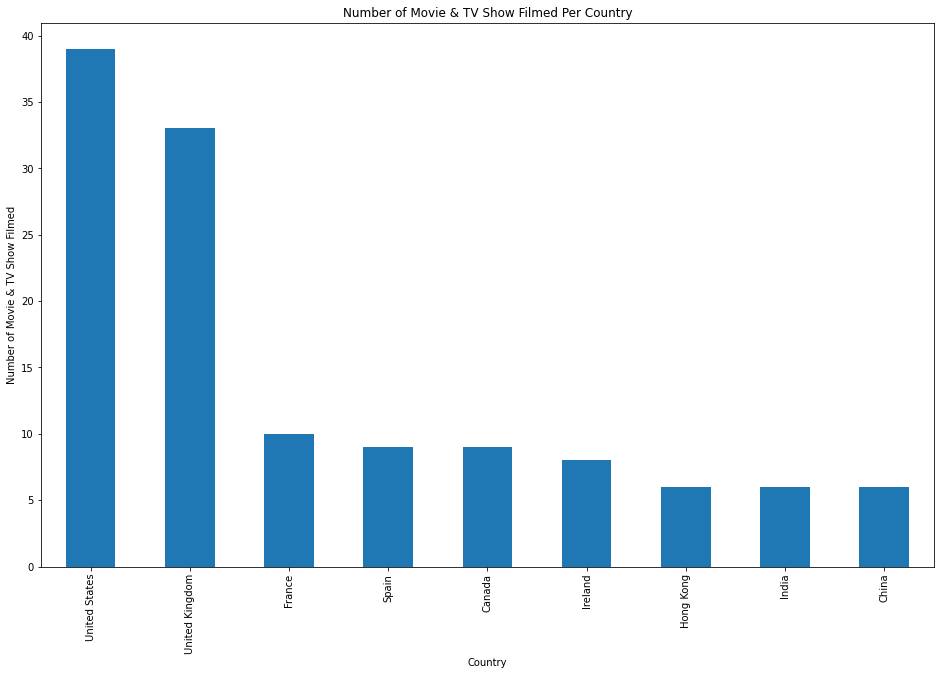

In [9]:
# OPTION FIRST

# Pull out the list of genres
country_index_list = merged_df['country'].value_counts().index.tolist()

# Pull out the value of genres
country_value_list = merged_df['country'].value_counts().tolist()

counter = 0
country_dict = {}
for countries in country_index_list:
    country = countries.split(",")[0]
    if country not in country_dict.keys():
        country_dict[country] = 0
    country_dict[country] += 1
    
key = list(country_dict.keys())
value = list(country_dict.values())
df_dict = {'countries': key,
       'values': value}
df_dict

# TESTING
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

countries_df = pd.DataFrame(df_dict)
renamed_countries_df = countries_df.set_index('countries')
sorted_countries_df = renamed_countries_df.sort_values(by='values', ascending=False)
top_countries_df = sorted_countries_df.loc[sorted_countries_df['values'] > 5]
top_countries_df.plot(kind='bar', figsize=(16,10), xlabel = 'Country', ylabel='Number of Movie & TV Show Filmed', legend=None)
plt.title("Number of Movie & TV Show Filmed Per Country")
plt.show()

## Average IMDB Rating Per Genre

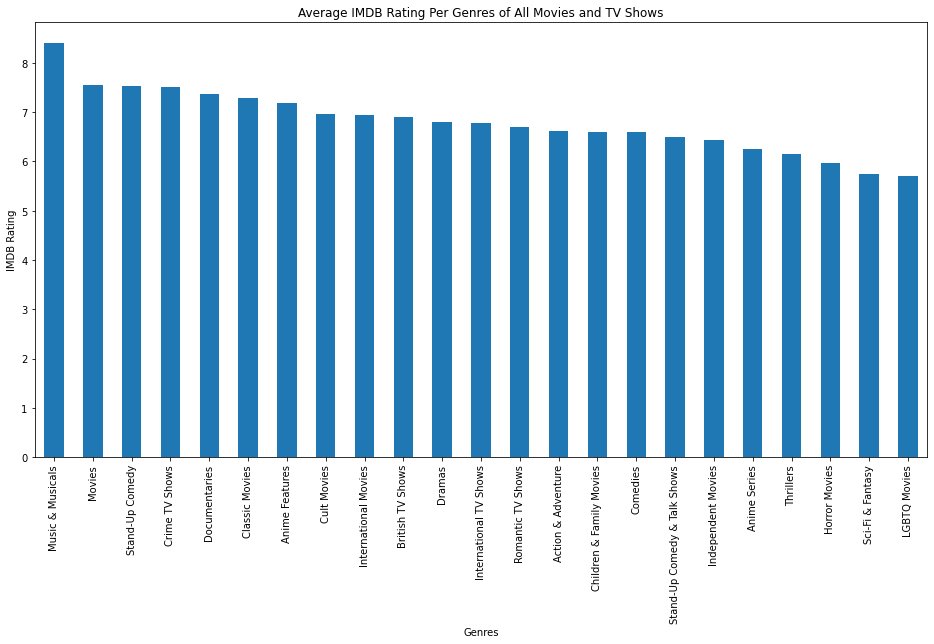

In [10]:
# Select the rating and genre column
genre_rating = merged_df[["genres", "imdb_rating"]]

# Find the average rating per genres
avg_rating = genre_rating.groupby("genres").mean()

# Sort the dataframe by rating
sorted_ratings = avg_rating.sort_values('imdb_rating', ascending = False)

# Plot the rating per genre in a bar graph
sorted_ratings.plot(kind="bar", figsize=(16,8), legend=None)
plt.xlabel("Genres")
plt.ylabel("IMDB Rating")
plt.title("Average IMDB Rating Per Genres of All Movies and TV Shows")
plt.show()

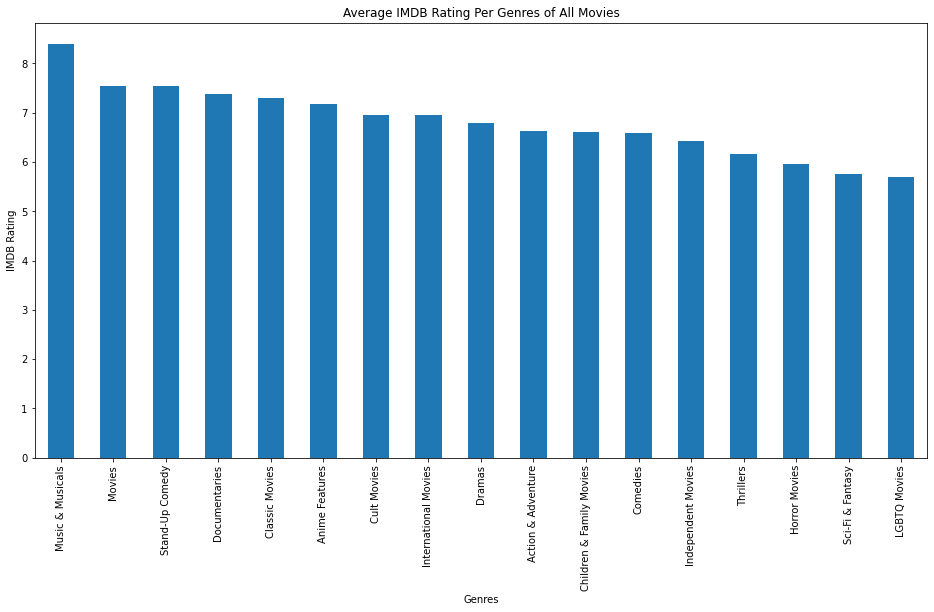

In [11]:
# MOVIES ONLY

# Plot the average rating per genre

# Select the rating and genre column
genre_rating = movie_df[["genres", "imdb_rating"]]

# Find the average rating per genres
avg_rating = genre_rating.groupby("genres").mean()

# Sort the dataframe by rating
sorted_ratings = avg_rating.sort_values('imdb_rating', ascending = False)

# Plot the rating per genre in a bar graph
sorted_ratings.plot(kind="bar", figsize=(16,8), legend=None)
plt.xlabel("Genres")
plt.ylabel("IMDB Rating")
plt.title("Average IMDB Rating Per Genres of All Movies")
plt.show()

## Distribution of IMDB Rating

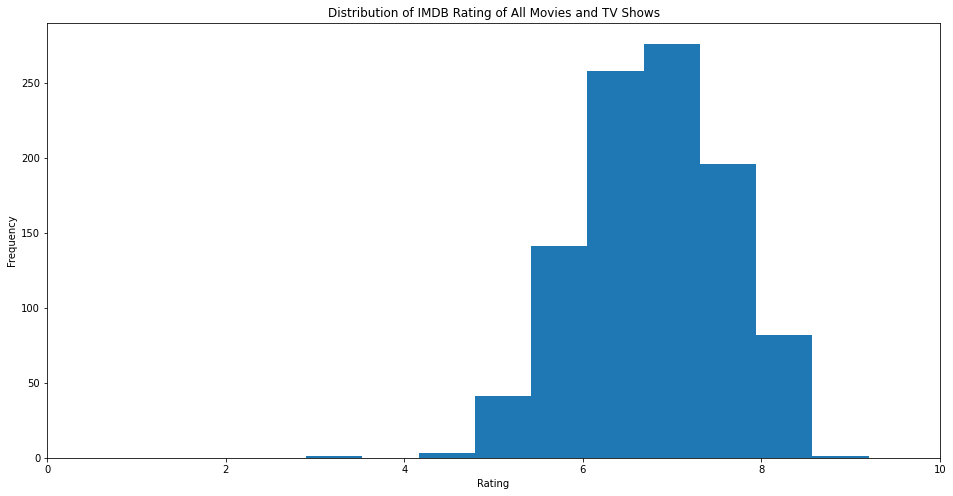

In [12]:
# Plot the histogram of IMDB Rating
merged_df['imdb_rating'].plot(kind='hist', bins=10, figsize=(16,8))
plt.xlabel("Rating")
plt.xlim((0,10))
plt.title("Distribution of IMDB Rating of All Movies and TV Shows")
plt.show()

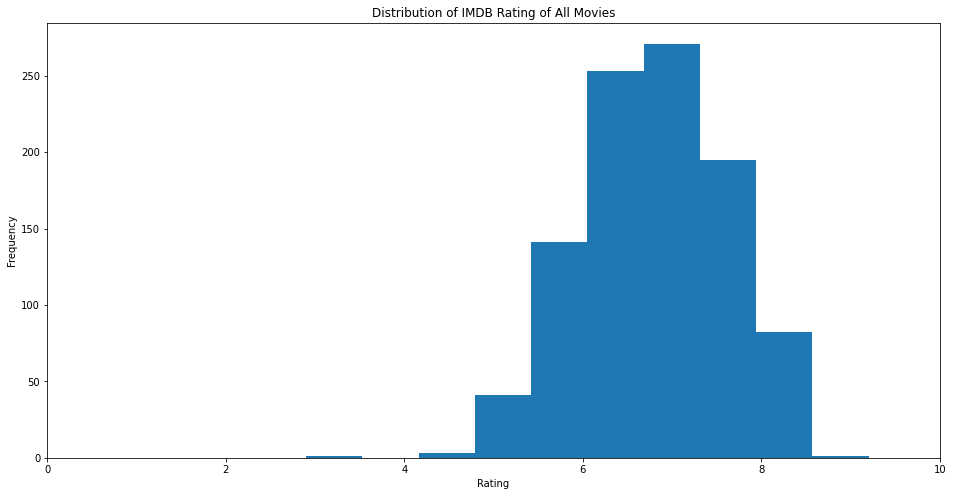

In [13]:
# MOVIES ONLY

# Plot the histogram of IMDB Rating
movie_df['imdb_rating'].plot(kind='hist', bins=10, figsize=(16,8))
plt.xlabel("Rating")
plt.xlim((0,10))
plt.title("Distribution of IMDB Rating of All Movies")
plt.show()

## Number of Movies Per Genre

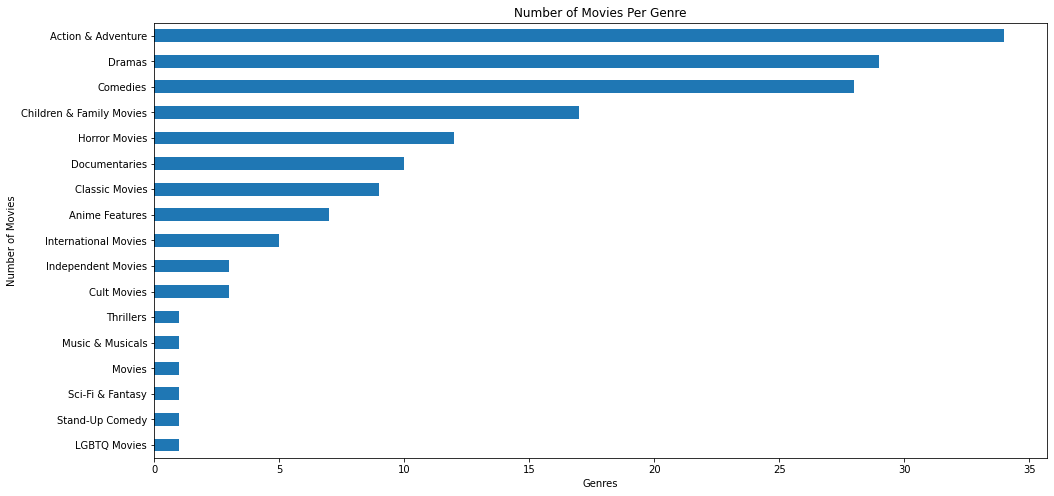

In [14]:
# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

# Get the first genres in every columns and count the number of each genre
genres_dict = {}
for genres in movie_genres_index_list:
    genre = genres.split(",")[0]
    if genre not in genres_dict.keys():
        genres_dict[genre] = 0
    genres_dict[genre] += 1

# Create a dictionary of list for plotting
key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}
df_dict

# # Testing for total number of counts
# total = 0
# for (key, value) in genres_dict.items():
#     total += value
# total

# Transform the collection into a dataframe and plot a horizontal bar graph
genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', figsize=(16,8), legend=None)
plt.ylabel("Number of Movies")
plt.xlabel("Genres")
plt.title("Number of Movies Per Genre")
plt.show()

# Supplemental Codes

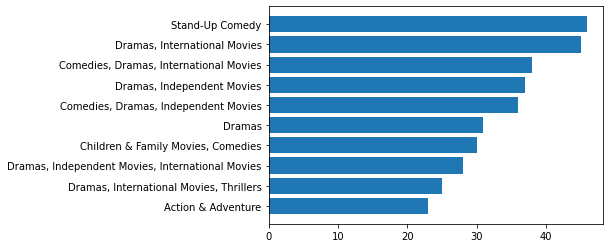

In [15]:
# LEAVE IT
# OPTION TOTAL

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()

plt.barh(movie_genres_index_list[10:0:-1], movie_genres_value_list[10:0:-1])
plt.xticks(rotation = 0)
plt.show()

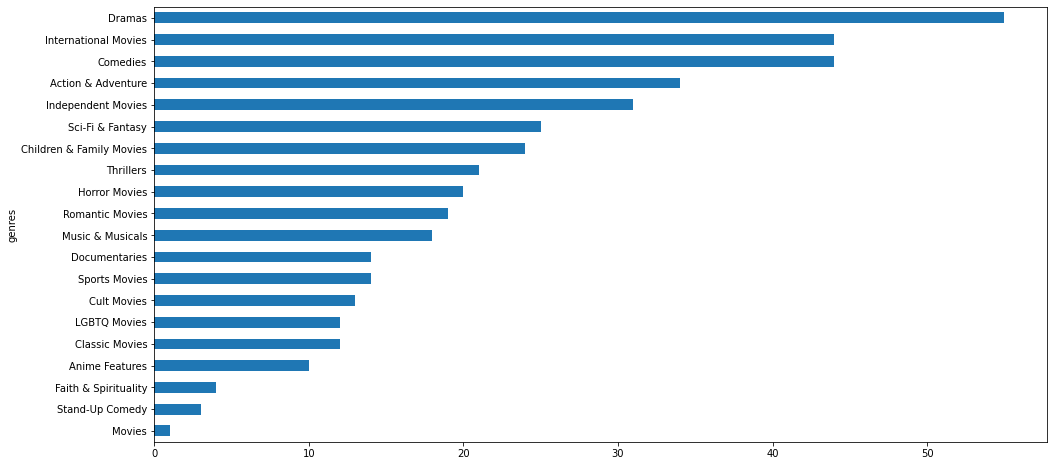

In [16]:
# LEAVE IT
# OPTION SPLIT

# Pull out the list of genres
movie_genres_index_list = movie_df['listed_in'].value_counts().index.tolist()

# Pull out the value of genres
movie_genres_value_list = movie_df['listed_in'].value_counts().tolist()


# 
counter = 0
genres_dict = {}

for genres_row in movie_genres_index_list:
    genres = genres_row.split(", ")

    for genre in genres:
        if genre not in genres_dict.keys():
            genres_dict[genre] = 0
        genres_dict[genre] += 1
    
    

key = list(genres_dict.keys())
value = list(genres_dict.values())
df_dict = {'genres': key,
       'values': value}

total = 0
for (key, value) in genres_dict.items():
    total += value
total
# counter

genres_df = pd.DataFrame(df_dict)
renamed_genres_df = genres_df.set_index('genres')
sorted_genres_df = renamed_genres_df.sort_values(by='values')
sorted_genres_df.plot(kind='barh', figsize=(16,8), legend=None)
plt.show()